Dataset Loaded Successfully!

   Size Location  Number of Rooms   Price
0  1360    Rural                6  280383
1  4272    Urban                4  779656
2  3592    Urban                5  635085
3   966    Rural                1  153442
4  4926    Rural                6  478526

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Size             200 non-null    int64 
 1   Location         200 non-null    object
 2   Number of Rooms  200 non-null    int64 
 3   Price            200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB
None

Missing Values:
Size               0
Location           0
Number of Rooms    0
Price              0
dtype: int64

Model Evaluation:
RMSE: 141307.90
R² Score: 0.52


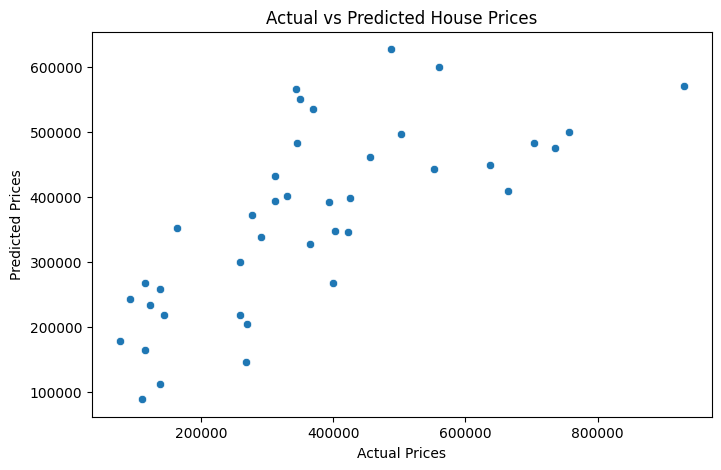

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Step 1: Load the dataset
df = pd.read_csv("house_prices.csv")
print("Dataset Loaded Successfully!\n")
print(df.head())

# Step 2: Data Exploration
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

# Handle missing values
df.fillna(df.select_dtypes(include=['number']).median(), inplace=True)

# Step 3: Data Preprocessing
# Define features and target
X = df[['Size', 'Location', 'Number of Rooms']]
y = df['Price']

# Preprocessing pipeline
numeric_features = ['Size', 'Number of Rooms']
categorical_features = ['Location']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(), categorical_features)
])

# Step 4: Model Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with preprocessing and linear regression
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the model
model.fit(X_train, y_train)

# Step 5: Model Evaluation
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\nModel Evaluation:\nRMSE: {rmse:.2f}\nR² Score: {r2:.2f}")

# Visualizing Predictions
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()
